In [2]:
'''
In this notebook, I hope to learn about how I can manipulate diagrams via functions - how I can access the class and so on... 
'''

# Import all kinds of different things

from lambeq.backend.grammar import (Box, Cap, Cup, Diagram, Diagrammable,
                                    Functor, grammar, Id, Spider, Swap,
                                    Ty, Word)
from lambeq.backend.drawing import draw
import matplotlib.pyplot as plt
from lambeq import AtomicType

N = AtomicType.NOUN
S = AtomicType.SENTENCE

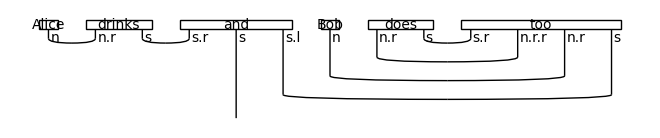

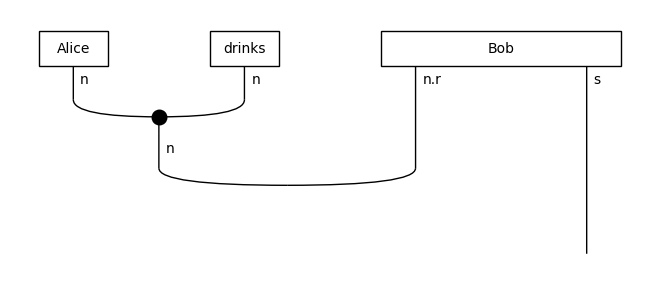

In [3]:
# Easy example:

n, s = Ty('n'), Ty('s')


# create a diagram with the shape of verb phrase ellipsis
words = [
    Word('Alice', n),
    Word('drinks', n.r @ s),
    Word('and', s.r @ s @ s.l),
    Word('Bob', n),
    Word('does', n.r @ s),
    Word('too', s.r @ n.r.r @ n.r @ s)
]



cups = (Cup(N, N.r) @ Cup(S, S.r) @ Id(S) @ Id(s.l) @ Id(n) @ Id(n.r) @ Cup(s, s.r) @ Id(n.r.r) @ Id(n.r) @ Id(s) >> 
        Id(s) @ Id(s.l) @ Id(n) @ Cup(n.r, n.r.r) @ Id(n.r) @ Id(s) >> 
        Id(s) @ Id(s.l) @ Cup(n, n.r) @ Id(s) >> 
        Id(s) @ Cup(s.l, s))


diagram = Id().tensor(*words) >> cups


def ManipulateDiag(diag): 

    newWords = [
        Word(str(diag.boxes[0]), n),
        Word(str(diag.boxes[1]), n),
        Word(str(diag.boxes[3]), n.r @ s)
    ]

    newGrammar = (Spider(n, 2, 1) @ Id(n.r) @ Id(s) >> 
            Cup(n, n.r) @ Id(s) )

    newDiag = Id().tensor(*newWords) >> newGrammar

    return newDiag

test = ManipulateDiag(diagram)
draw(diagram)
draw(test)


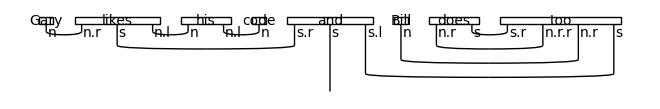

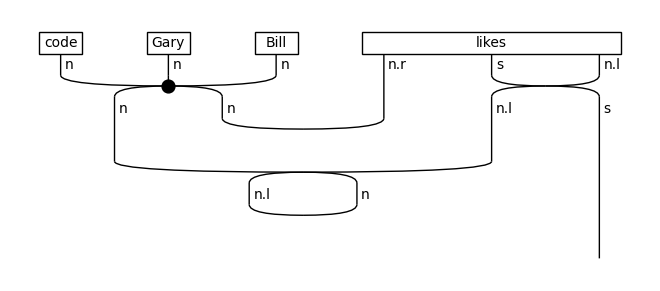

In [4]:

'''
Now, the second kind of VPA:

    Gary likes his code and Bill does, too. 

'''
from lambeq import BobcatParser

sentence = 'Gary likes his code and Bill does too.'

# Parse the sentence and convert it into a string diagram
# parser = BobcatParser(verbose='suppress')
# diagram = parser.sentence2diagram(sentence)
# diagram.draw(figsize=(14,3), fontsize=12)


# create a diagram with the shape of verb phrase ellipsis
words = [
    Word('Gary', n),
    # here, we have an object, this verb looks different
    Word('likes', n.r @ s @ n.l),
    Word('his', n @ n.l),
    Word('code', n),
    Word('and', s.r @ s @ s.l), 
    Word('Bill', n),
    Word('does', n.r @ s),
    Word('too', s.r @ n.r.r @ n.r @ s)
]


cups = (Cup(N, N.r) @ Id(S) @ Cup(n.l, n) @  Cup(n.l, n) @ Id(s.r) @ Id(s) @ Id(s.l)@ Id(n) @ Id(n.r) @ Cup(s, s.r) @ Id(n.r.r) @ Id(n.r) @ Id(s) >> 
        Cup(s, s.r) @ Id(s) @ Id(s.l) @ Id(n) @ Cup(n.r, n.r.r) @ Id(n.r) @ Id(s) >> 
        Id(s) @ Id(s.l) @ Cup(n, n.r) @ Id(s) >> 
        Id(s) @ Cup(s.l, s))


diagram2 = Id().tensor(*words) >> cups

def ManipulateTwo(diag):

    newWords = [
        Word(str(diag.boxes[3]), n),
        Word(str(diag.boxes[0]), n),
        Word(str(diag.boxes[5]), n), 
        Word(str(diag.boxes[1]), n.r @ s @ n.l)
    ]

    newGrammar = (Spider(n, 3, 2) @ Id(n.r) @ Swap(s, n.l) >>
            Id(n) @ Cup(n, n.r) @ Id(n.l) @ Id(s) >>
            Swap(n, n.l) @ Id(s) >>
            Cup(n.l, n) @ Id(s))

    newDiag = Id().tensor(*newWords) >> newGrammar

    return newDiag

test2 = ManipulateTwo(diagram2)

draw(diagram2)
draw(test2)
     



In [5]:
'''

We see that we can either parse the sentence by hand, using the method shown above (which is significantly faster than using the BobCatParser)

But - we can also use the BobCatParser in order to access specific boxes and their content. 

Now that we have a method to translate the diagrams into each other, we can translate them into quantum circuits very easily. 


'''


'\n\nWe see that we can either parse the sentence by hand, using the method shown above (which is significantly faster than using the BobCatParser)\n\nBut - we can also use the BobCatParser in order to access specific boxes and their content. \n\nNow that we have a method to translate the diagrams into each other, we can translate them into quantum circuits very easily. \n\n\n'

In [6]:
from lambeq import IQPAnsatz

# the easy example first 

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
circuit = ansatz(diagram)
# circuit.draw(figsize=(15,10))

In [7]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = circuit.to_tk()

# render_circuit_jupyter(tket_circuit)

/Users/jurekeisinger/Library/Python/3.9/lib/python/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


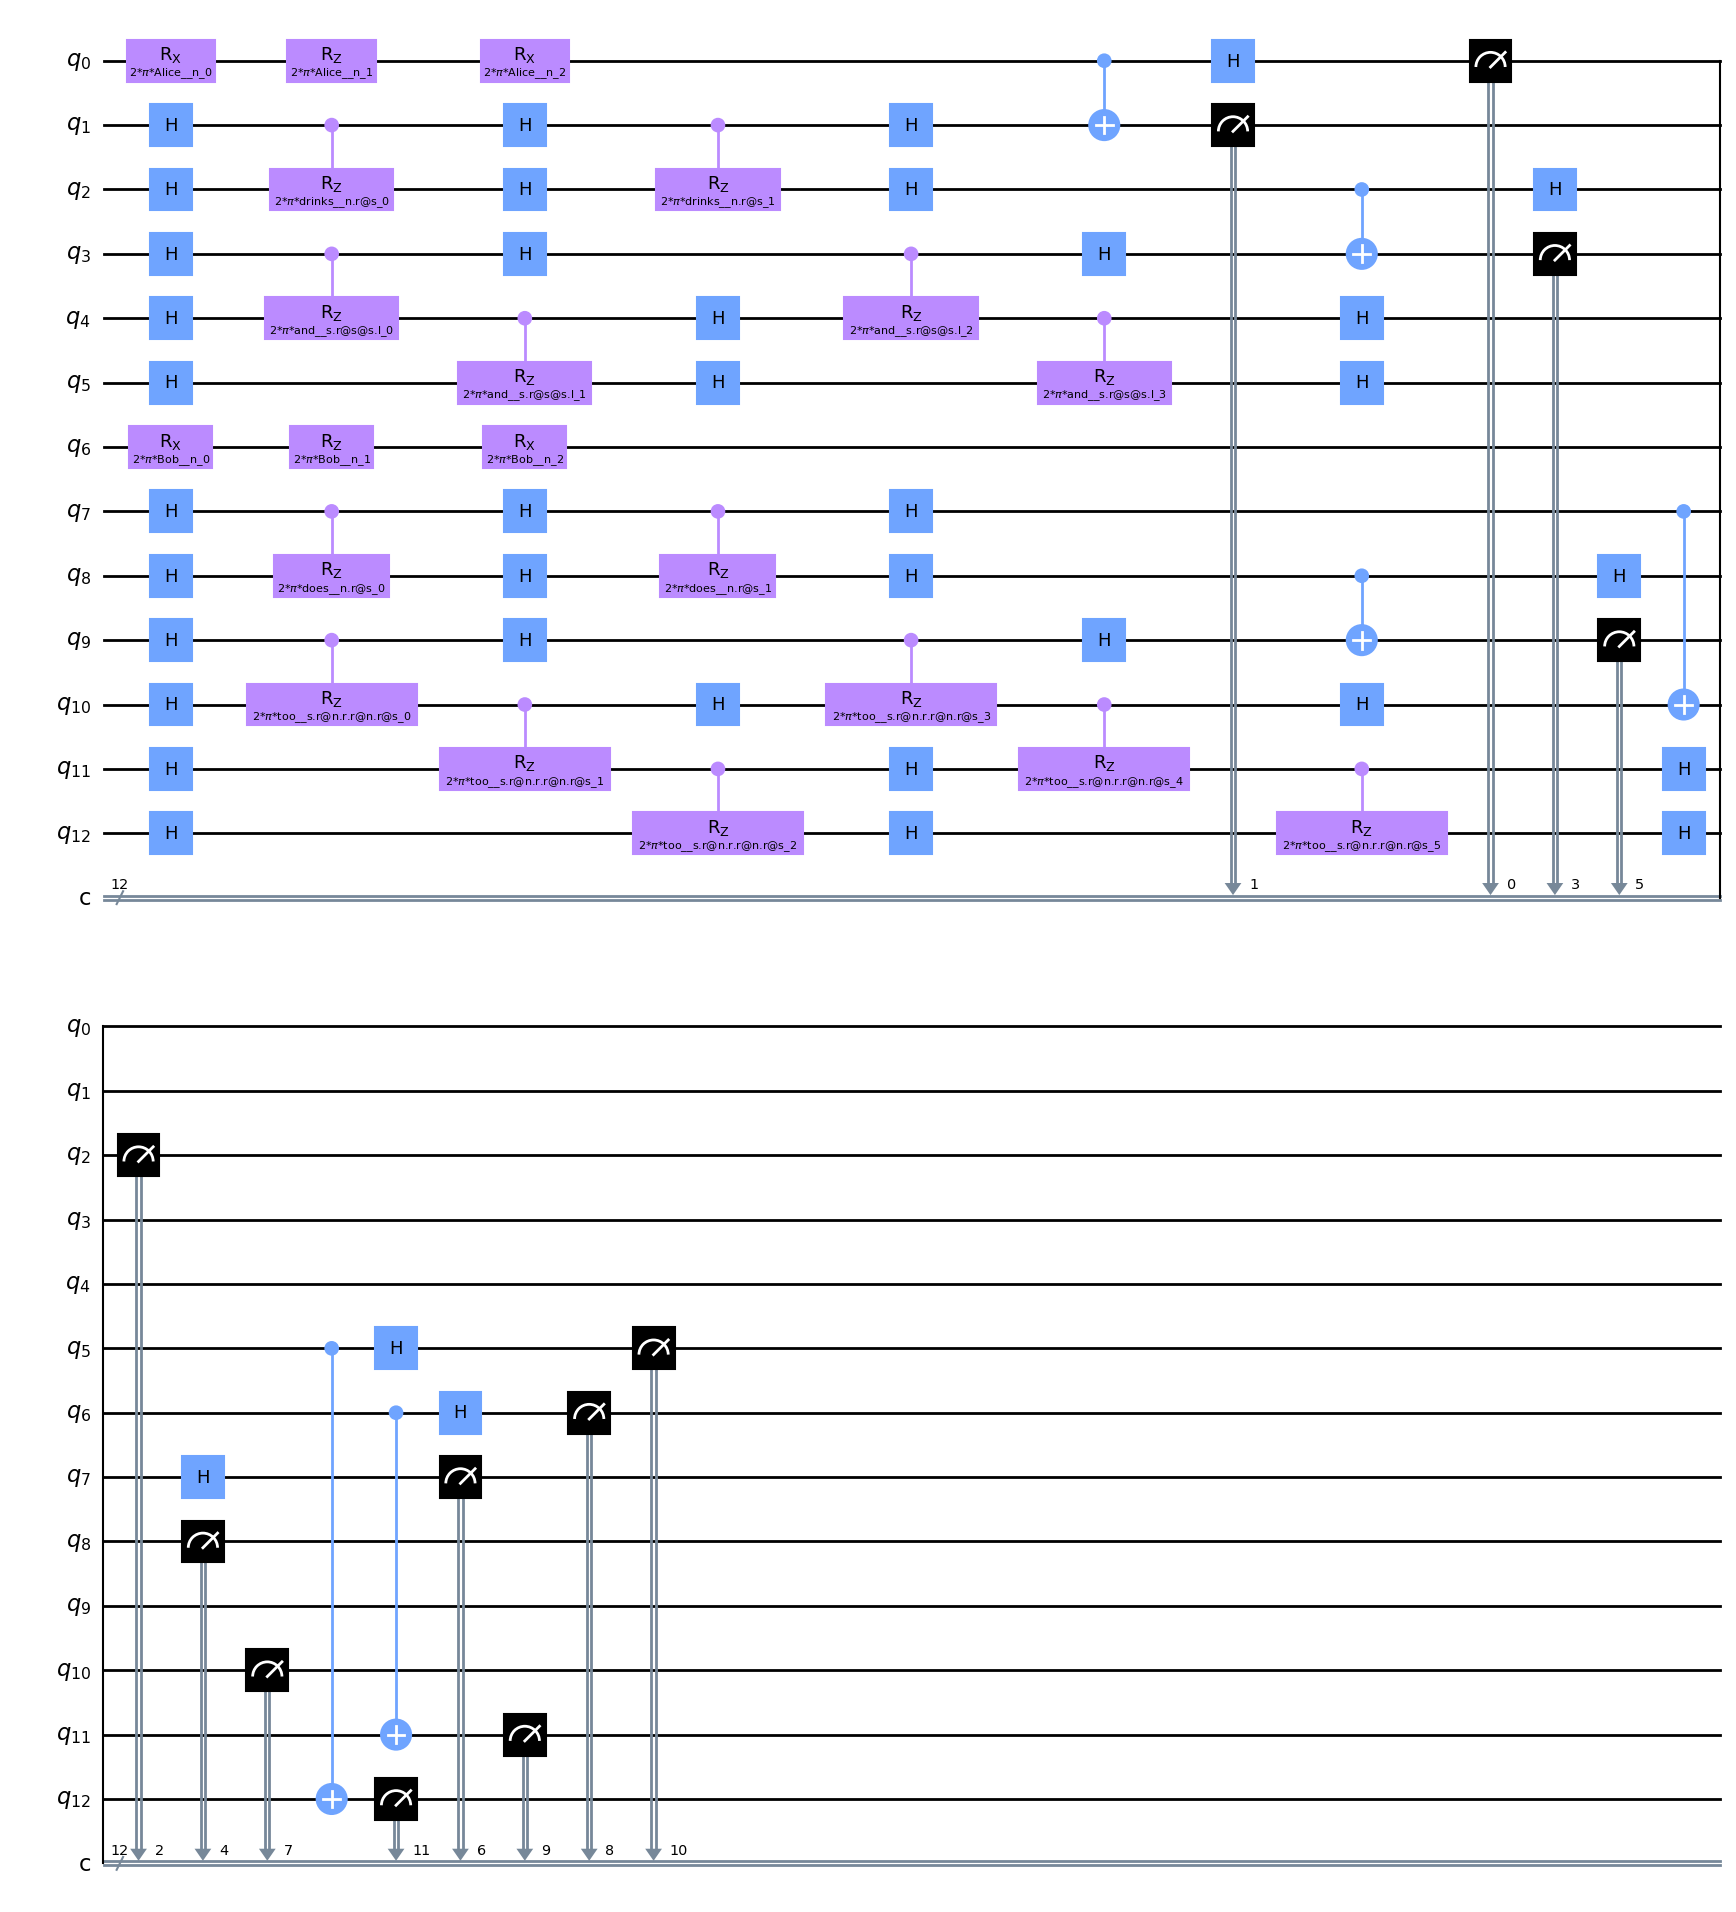

In [9]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

qiskit_circuit.draw(output='mpl')